In [1]:
import sys
sys.path.append("..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-english'
MODEL_NAME = 'xlm-roberta-base'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

my hea aches for the friends and family of dead and injured in orlando...senseless #orlandohorror   #prayers 0
can't wait to get moved into our new home this weekend ð¡ð« and for a week off ð     @user â¤ï¸â¤ï¸â¤ï¸ 0
#cleaning #spaces. creating   #faces.  0
on route to ally pally #boxcup @user   @user @user @user  0
Please follow https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

my hea aches for the friends and family of dead and injured in orlandosenseless 0
cant wait to get moved into our new home this weekend ð¡ð« and for a week off ð â¤ï¸â¤ï¸â¤ï¸ 0
creating 0
on route to ally pally 0
please follow 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [9]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 618/618 [03:34<00:00,  2.88it/s, loss=0.0192]


Train loss 0.11776897101135606 accuracy 0.9536644342883186
Validation loss 0.06532968352413149 accuracy 0.9782377516141284
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9782377516141284
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 618/618 [03:34<00:00,  2.88it/s, loss=0.003]  


Train loss 0.06270904576784138 accuracy 0.9775538366101609
Validation loss 0.06619993052038464 accuracy 0.9772502848461831
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 618/618 [03:35<00:00,  2.87it/s, loss=0.00192]


Train loss 0.05007183272805981 accuracy 0.9826304928534353
Validation loss 0.05800933836172651 accuracy 0.9803266236232435
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9803266236232435
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 618/618 [03:34<00:00,  2.88it/s, loss=0.00101]


Train loss 0.04222468916186611 accuracy 0.9857195305675474
Validation loss 0.06506890768537894 accuracy 0.979794910748196
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 618/618 [03:35<00:00,  2.86it/s, loss=0.00093]


Train loss 0.035824659154739105 accuracy 0.9879476889187102
Validation loss 0.07108198208802208 accuracy 0.9788834029624004
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 618/618 [03:34<00:00,  2.88it/s, loss=0.000601]


Train loss 0.03182444167913022 accuracy 0.9893909278507134
Validation loss 0.07673266632550224 accuracy 0.9799848082035701
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 618/618 [03:34<00:00,  2.89it/s, loss=0.000845]


Train loss 0.02849895713216411 accuracy 0.9904923470356631
Validation loss 0.07612018362625764 accuracy 0.9796050132928219
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 618/618 [03:34<00:00,  2.88it/s, loss=0.000483]


Train loss 0.02329941129835223 accuracy 0.9924673055741938
Validation loss 0.08365212207308573 accuracy 0.9801747056589443
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


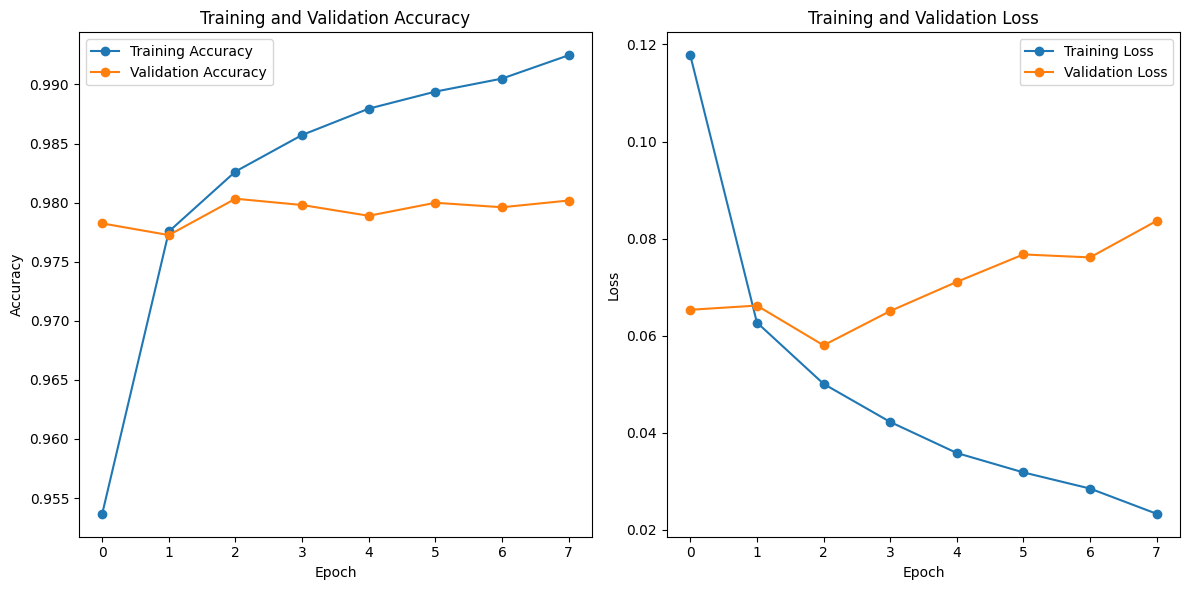

In [11]:
hlp.plot_history(history)

In [12]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.979377136346373 Test Loss: 0.08407361664666875


Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.98      0.98     16109
        Hate       0.97      0.98      0.97     10221

    accuracy                           0.98     26330
   macro avg       0.98      0.98      0.98     26330
weighted avg       0.98      0.98      0.98     26330



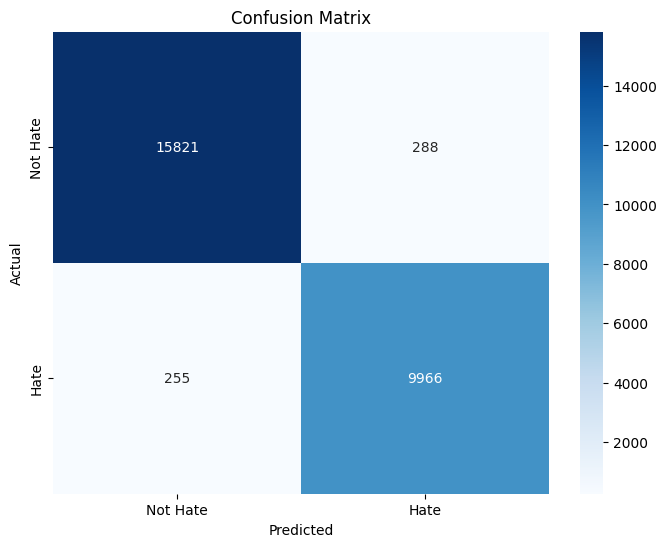

In [13]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [14]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.85
